# <center>  Detección y reconocimiento de expresiones faciales para pacientes con prosopagnosia visual  </center>
### <center> (visión artificial y Machine Learning) </center>

# Grupo 5

### Integrantes:
- Marlon Nivia
- Andres Serna
- Hinara Sánchez
- Camila Hernández


## ¿Qué es la Prosopagnosia?

Es un trastorno perceptivo adquirido por daño cerebral, en el que la persona afectada es incapaz de reconocer, a través de la vista, estímulos visuales como los rostros. Los pacientes deben aprender a vivir con su déficit y buscar nuevas estrategias para compensarlo:

- Las claves contextuales.
- Comparación con fotografías.
- Compensación a través de otros estímulos.

# ¿Para qué?

Con el desarrollo del proyecto se espera crear un software de apoyo para los pacientes que sufren de este tipo de agnosia visual, redireccionando el estímulo  perdido hacia otros canales y lenguajes perceptivos, tales como la escucha y el tacto. Este software podría ser implementado tentativamente en un <b>aplicativo movil</b> o como parte de algún dispositivo vestible que los pacientes puedan usar cotidianamente, como las <b>Smart Glasses</b>.

# ¿Cómo resolverlo?

La adquisición de los datos base para trabajar la hicimos a traves de la página de Kaggle. Alli se encuentra el dataset que usaremos junto al <b>API KERAS</b> para llevar a cabo el proceso de codificación.

Con el fin de enriquecer la base de datos obtenida, decidimos valernos de las utilidades y los modelos pre-entrenados ofrecidos por la libreria de openCV para el reconocimiento de rostros. Estos algoritmos nos ayudan en el preprocesamiento de las imagenes adquiridas, ademas de segmentarlas, redimensionarlas y almacenarlas como una base de datos nueva. Posteriormente analizamos la pertinencia de realizar algún proceso de interpolacion linear o cubica y una umbralizacion del histograma en las imagenes, esto con el fin de mejorar la calidad de la información.

Para aplicar la codificación mencionada anteriormente será necesario el uso de <b>Redes Neuronales Convolucionales(CNN)</b>, <b>Machine Learning</b> y el <b>Backend TensorFlow</b>.

#  <center>  Visión artificial tradicional VS Redes neuronales convolucionales </center>

A comienzos de este siglo las estrategias que se utilizaban para la detección de rostros en una imagen estaban basadas en los algoritmos tradicionales de la visión por computadora, basicamente con el uso de diferentes filtros clasicos se realizaba un barrido por toda la imagen en busqueda de patrones especificos que determinaran la presencia de un rostro, sin embargo en el proceso los investigadores se daban cuenta de que este modelo traía consigo los siguientes retos:

* #### Las condiciones de las imagenes de estudio deben ser <B><FONT COLOR="red">ideales y muy controladas<B> para que el resultado sea optimo.
![image-7.png](attachment:image-7.png)

* #### La gran variedad de tipos de rostros, representa que la extracción de características no siga un patrón totalmente definido.
![image-2.png](attachment:image-2.png)
 

* #### El tamaño y orientación de la cabeza genera patrones erroneos, puesto que los modelos clasicos se realizan sobre rostros ubicados frontalmente.


* #### Un rostro es un objeto cambiante a travez del tiempo, por tanto las caraterísticas faciales tambien dependen de la edad de la persona.
![image-3.png](attachment:image-3.png)


* #### La identificación de los rostros pueden tener multiples distacciones los cuales afectan su reconocimiento.
![image-6.png](attachment:image-6.png)

* #### Gran parte del trabajo en el reconocimiento de rostros por computadora enfocado en detectar características individuales como los ojos, el contorno de la nariz, la boca y la cabeza, y la definición de un modelo facial por la posición, el tamaño y las relaciones entre estas características estos enfoques han resultado difíciles de extender a múltiples puntos de vista, y a menudo han sido bastante frágiles, requiriendo una buena suposición inicial para guiarlos. Investigación en las estrategias humanas de reconocimiento facial, además, ha demostrado que los rasgos individuales y sus relaciones inmediatas comprenden una representación insuficiente para dar cuenta del desempeño del rostro humano adulto.
![image-5.png](attachment:image-5.png)

* #### Las caraterísticas se realizan en gran parte por evaluaciones subjetivas (por ejemplo, forma del cabello, longitud de las orejas, grosor de los labios) hecho por humanos, cada uno de los cuales sería bastante difícil de automatizar.
![image-8.png](attachment:image-8.png)









Partiendo de la premisa de que el reconocimiento facial es bastante difícil, porque los rostros son estímulos visuales complejos, multidimensionales y significativos. Las redes neuronales convoluciones permiten el manejo de un volumen mayor de datos e información, que con la tecnicas tradicionales tomarian mucho tiempo. Por lo tanto estas redes neuronales permiten  detectar rostros con alta precisión independendientemente de las condiciones en las que se encuentran, son eficientes bajo condiciones ampliamente variables, tiene capacidad de aprendizaje e insensibilidad a los cambios graduales en la imagen de un rostro.

# Pre-procesamiento de Imagenes

Primero procedemos a utilizar openCV, la libreria de OS y uno de sus modelos pre-entrenados Haar Cascades para detectar los posibles rostros que se puedan encontrar en un banco de imagenes especifico.

In [ ]:
%matplotlib inline 
import numpy as np
import cv2
import os #libreria util para crear directorios, listar archivos especificos, etc.
import matplotlib.pyplot as plt

## Detectar rostros

Comenzaremos detectando los rostros en imagenes cuya expresión facial es la alegria y el enojo, para posteriormente realizar el mismo procedimiento con las demás emociones.

In [ ]:
#Asignamos a "imagesPath" la ruta en donde estan presentes las imágenes con las que se va a trabajar.
imagesPath = "expresiones"

#Aquí estamos listando los archivos y directorios presentes en el directorio "imagesPath" 
#además los estamos almacenando en la variable "imagesPathList".
imagesPathList = os.listdir(imagesPath)

print("imagesPathList=", imagesPathList) #imprimimos la lista de images ubicadas en el directorio.

imagesPathList= ['rostros1.jpg', 'rostros10.jpg', 'rostros12.jpg', 'rostros13.png', 'rostros2.jpg', 'rostros3.png', 'rostros4.jpg', 'rostros5.jpg', 'rostros6.jpg', 'rostros8.jpg', 'rostros9.jpg']


In [ ]:
#Verificamos si existe algún directorio llamado ‘data alegria’ donde se almacenaran los rostros detectados.
#si no es así lo creamos.
if not os.path.exists('data'):
    print('Carpeta creada: data')
    os.makedirs('data')

In [ ]:
#Cargamos el clasificador de rostros.
faceClassif = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

#Inicializamos el contador 'count' que nos ayudará con los nombres para cada rostro.
count = 0

In [ ]:
#Con el ciclo 'for' vamos a leer el nombre de cada imagen de la carpeta del directorio.
for imageName in imagesPathList:
    print('imageName=', imageName) #Imprimimos las imagenes leidas.
    
    #Añadimos la ruta principal y dicho nombre de la imagen para leerla con 'cv2.imread' en escala de grises.
    image = cv2.imread(imagesPath+'/'+imageName)
    imageAux = image.copy() #Creamos una imagen auxiliar copia de la imagen de entrada.
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #Transformamos la imagen de entrada en escala de grises.

imageName= rostros1.jpg
imageName= rostros10.jpg
imageName= rostros12.jpg
imageName= rostros13.png
imageName= rostros2.jpg
imageName= rostros3.png
imageName= rostros4.jpg
imageName= rostros5.jpg
imageName= rostros6.jpg
imageName= rostros8.jpg
imageName= rostros9.jpg


In [ ]:
#Almacenamos las coordenadas de cada rostro dentro de la variable 'faces'.
faces = faceClassif.detectMultiScale(gray, 1.1, 5) #Detectar los rostros.

#Desempaquetar coordenadas, ancho y alto de cada rostro detectado.
for (x,y,w,h) in faces:
        cv2.rectangle(image, (x,y),(x+w,y+h),(128,0,255),2) #Dibujar rectangulo alrededor.
        cv2.rectangle(image,(10,5),(450,25),(255,255,255),-1)
        
        #Presionar 's' para almacenar cada rostro
        cv2.putText(image,'Presione s, para alamacenar los rostros encontrados',(10,20), 2, 0.5,(128,0,255),1,cv2.LINE_AA)
        
        cv2.imshow('image', image)
        k = cv2.waitKey(0) #Asignar la tecla 's' para que se guarden los rostros detectados en el nuevo directorio.
        if  k == ord('s'):
            for (x,y,w,h) in faces: #si k = s se procedera con el recorte de los rostros.
                rostro = imageAux[y:y+h,x:x+w]
                rostro = cv2.resize(rostro,(150,150), interpolation=cv2.INTER_CUBIC) #redimensionamiento de los rostros.
                                                                                     #hacemos una operación de interpolación
                                                                                     #bicubica para recuperar información.
                cv2.imshow('rostro',rostro) #Visualizar el proceso de recorte en una nueva ventana emergente.
                cv2.waitKey(0)
                cv2.imwrite('data/rostro_{}.jpg'.format(count),rostro) #almacenamiento de los rostros en la nueva carpeta
                count = count +1 #asignar al rostro almacenado el nombre correspondiente a 'count' + 1 .                                     
        elif k == 27:
            break
      
        
        cv2.destroyAllWindows() #cerrar ventanas.

## Visualización del proceso

Dado que la función <b>cv2.imshow</b> permite mostrar el proceso que se esta ejecutando en una ventada emergente, por motivos practocos presentamos dos pantallazos de lo que fue el proceso de deteccion y posterior recorte de los rostros:

Proceso 1
![image.png](attachment:image.png)<img src="res/deteccion1.jpg">
Proceso 2
![image-2.png](attachment:image-2.png)<img src="res/deteccion2.jpg">



## Resultados

Leemos algúnos de los rostros detectados en la base de datos recien creada con el fin de analizarlos en detalle.

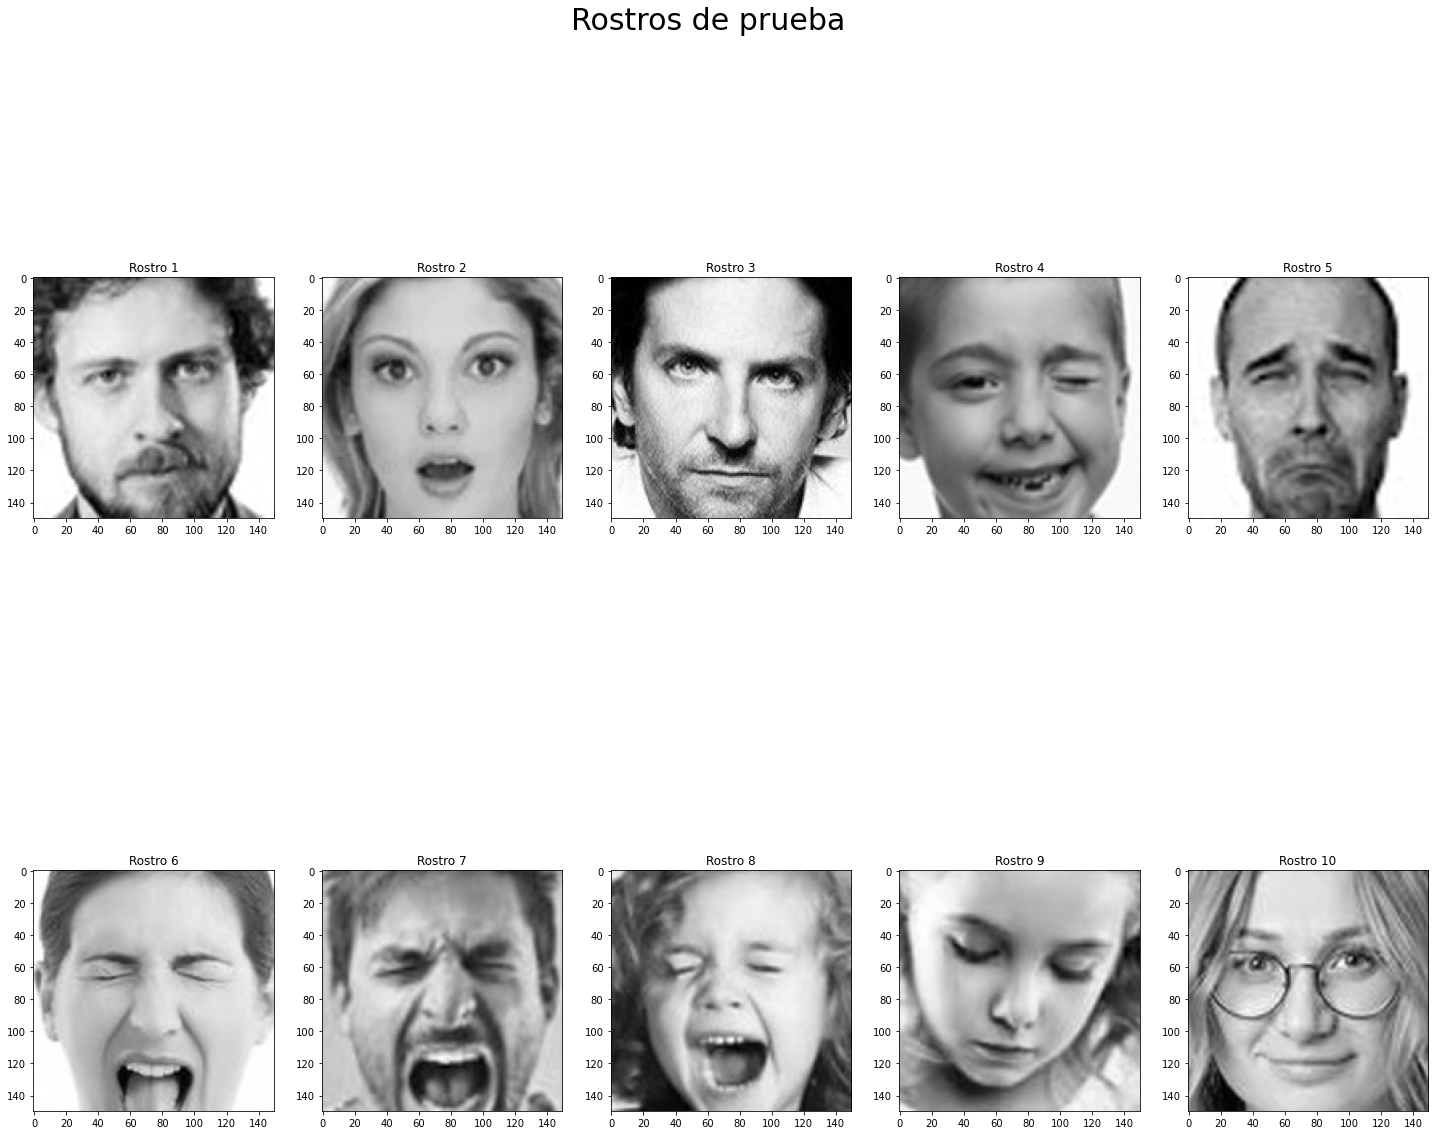

In [ ]:
#Leer las imágenes de trabajo en escala de grises.
img1 = cv2.imread("data/rostro_1.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("data/rostro_14.jpg", cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread("data/rostro_29.jpg", cv2.IMREAD_GRAYSCALE)
img4 = cv2.imread("data/rostro_40.jpg", cv2.IMREAD_GRAYSCALE)
img5 = cv2.imread("data/rostro_58.jpg", cv2.IMREAD_GRAYSCALE)
img6 = cv2.imread("data/rostro_71.jpg", cv2.IMREAD_GRAYSCALE)
img7 = cv2.imread("data/rostro_86.jpg", cv2.IMREAD_GRAYSCALE)
img8 = cv2.imread("data/rostro_94.jpg", cv2.IMREAD_GRAYSCALE)
img9 = cv2.imread("data/rostro_112.jpg", cv2.IMREAD_GRAYSCALE)
img10 = cv2.imread("data/rostro_125.jpg", cv2.IMREAD_GRAYSCALE)



#Mostrar las imágenes.
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2,5, figsize=(25, 20))
fig.suptitle('Rostros de prueba', fontsize=30)

ax1.set_title('Rostro 1')
ax1.imshow(img1, cmap='gray')
ax2.set_title('Rostro 2')
ax2.imshow(img2, cmap='gray')
ax3.set_title('Rostro 3')
ax3.imshow(img3, cmap='gray')
ax4.set_title('Rostro 4')
ax4.imshow(img4, cmap='gray')
ax5.set_title('Rostro 5')
ax5.imshow(img5, cmap='gray')
ax6.set_title('Rostro 6')
ax6.imshow(img6, cmap='gray')
ax7.set_title('Rostro 7')
ax7.imshow(img7, cmap='gray')
ax8.set_title('Rostro 8')
ax8.imshow(img8, cmap='gray')
ax9.set_title('Rostro 9')
ax9.imshow(img9, cmap='gray')
ax10.set_title('Rostro 10')
ax10.imshow(img10, cmap='gray')

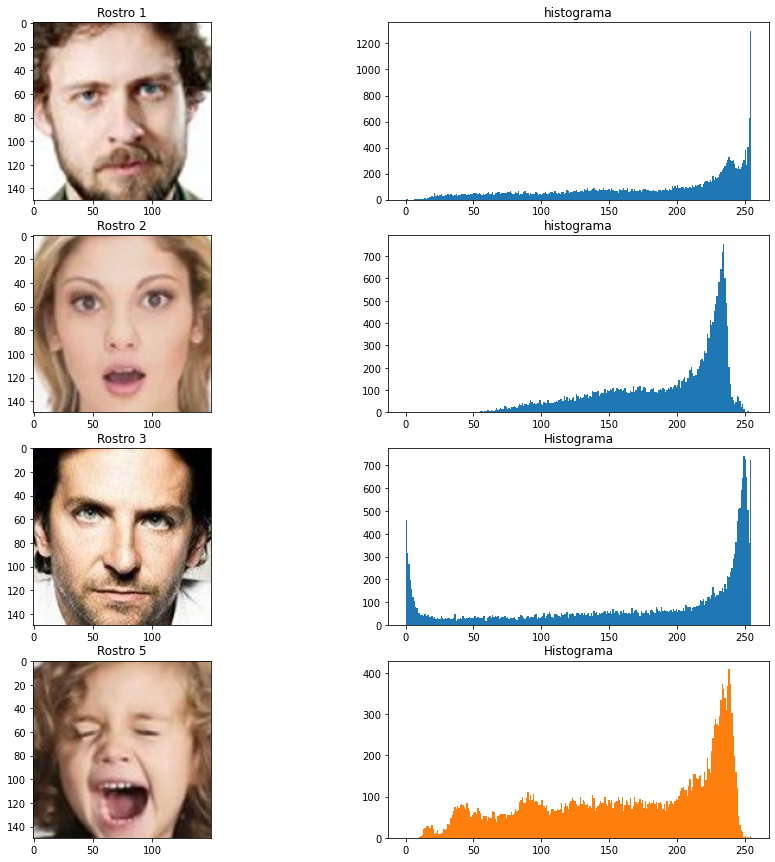

In [ ]:
#Leer las imágenes 1 a la 4 en RGB
img1 = cv2.imread("data/rostro_1.jpg", cv2.IMREAD_COLOR)
img1_rgb  = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("data/rostro_14.jpg", cv2.IMREAD_COLOR)
img2_rgb  = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.imread("data/rostro_29.jpg", cv2.IMREAD_COLOR)
img3_rgb  = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img4 = cv2.imread("data/rostro_94.jpg", cv2.IMREAD_COLOR)
img4_rgb  = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
img5 = cv2.imread("data/rostro_112.jpg", cv2.IMREAD_COLOR)
img5_rgb  = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)


#_ = es una forma de eliminar el verbose de matplotlib

#Se genera un arreglo para imprimir las imágenes, 4x2, 4 imágenes y 4 histogramas asociados.
fig, arreglo_plots = plt.subplots(4,2, figsize=(15, 15))
#Título del cuadro en la posición (0,0)
arreglo_plots[0,0].set_title('Rostro 1')
#Imprimir la imagen 1 en la posición (0.0) del arreglo
arreglo_plots[0,0].imshow(img1_rgb)
#Título del cuadro en la posición (0,1)
arreglo_plots[0,1].set_title('histograma')
#Imprimir el histograma en la posición (0,1)
_ = arreglo_plots[0,1].hist(img1_rgb[:,:,0].ravel(), bins=256, range=(0.0, 255.0))

#Análogamente para los demás casos, como se observa varía la posición asociada en el subplot
arreglo_plots[1,0].set_title('Rostro 2')
arreglo_plots[1,0].imshow(img2_rgb)
arreglo_plots[1,1].set_title('histograma')
_ = arreglo_plots[1,1].hist(img2_rgb[:,:,0].ravel(), bins=256, range=(0.0, 255.0))

arreglo_plots[2,0].set_title('Rostro 3')
arreglo_plots[2,0].imshow(img3_rgb)
arreglo_plots[2,1].set_title('Histograma')
_ = arreglo_plots[2,1].hist(img3_rgb[:,:,0].ravel(), bins=256, range=(0.0, 255.0))

arreglo_plots[3,0].set_title('Rostro 4')
arreglo_plots[3,0].imshow(img4_rgb)
arreglo_plots[3,1].set_title('Histograma')
_ = arreglo_plots[3,1].hist(img4_rgb[:,:,0].ravel(), bins=256, range=(0.0, 255.0))

arreglo_plots[3,0].set_title('Rostro 5')
arreglo_plots[3,0].imshow(img5_rgb)
arreglo_plots[3,1].set_title('Histograma')
_ = arreglo_plots[3,1].hist(img5_rgb[:,:,0].ravel(), bins=256, range=(0.0, 255.0))

# El Dataset

Las operaciones de entrenamiento y evaluación se manejaran con el conjunto de datos de <b>Fec2013</b>, estos hacen parte de un desafio propuesto por Kaggle en el año 2013 donde se invitaba a sus usuarios a crear un modelo que pudiera detectar y reconocer las 7 expresiones basicas del rostro humano. La versión comprimida de este dataset ocupa 92 MB de espacio, mientras que la versión no comprimida ocupa 295 MB. Hay 28K imágenes de entrenamiento y 3K de prueba. Cada imagen fue almacenada con 48×48 píxeles. El conjunto de datos puro consiste en píxeles de imagen (48×48=2304 valores), la emoción de cada imagen y el tipo de uso (como instancia de prueba).

In [ ]:
#primero lo primero, importamos las librerias necesarias para leer la red:

import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

#paquete científico de Python para crear vectores y matrices grandes multidimensionales
import numpy as np
#herramienta para imprimir figuras y dibujar gráficos
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:

#cpu - gpu configuracion, se le asigna el numero de recursos el cual va a utilizar la maquina
#para poder realizar el procesamiento.
config = tf.compat.v1.ConfigProto ( device_count = {'GPU': 1 , 'CPU': 56} )

#max: 1 gpu, 56 cpu
#Para ejecutar el gráfico, necesitámos usar una encapsulación llamada sess . Y usando el método Session ,
#podríamos pasar datos de Python al gráfico y realmente entrenar nuestros modelos. Usando la configuracion
#establecida en la variable config.
sess = tf.compat.v1.Session(config=config)

#Para poder establecer la sesion creada anteriormente se utiliza la siguiente linea de codigo.
tf.compat.v1.keras.backend.set_session(sess)

In [ ]:

#variables
#El numero de etiquetas las cuales intenta predecir la red neuronal
num_classes = 7 #enojo, disgusto, miedo, alegria, tristeza, sorpresa, neutral

#El tamaño del lote define la cantidad de muestras que se propagarán a través de la red.
#Si se tienen 1050 muestras y se define un batch_size de 100, el programa toma las primeras
#100 muestras de datos y entrena la red, asi hasta llegar a 1000, y obtener las ultimas 50
#muestras.
#VENYAJAS DE TENER UN LOTE MENOR AL TAMAÑO TOTAL DE MUESTRAS
#1.Requiere menos memoria ya que se entrena con menos datos.
#2.Normalmente, las redes se entrenan más rápido con mini lotes.
#Eso es porque actualizamos los pesos después de cada propagación.
batch_size = 256

#Numero de periodos de entrenamientos el cual va a realizar la CNN
epochs = 15
#----------

Suponga que el conjunto de datos ya está cargado en la carpeta de datos. Aquí, podemos leer el contenido del conjunto de datos como se menciona a continuación.

In [ ]:
 
#read kaggle facial expression recognition challenge dataset (fer2013.csv)
#https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge


with open("fer2013.csv") as f:
    #El readlines() método devuelve una lista que contiene cada línea del archivo como un elemento de lista.
    content = f.readlines()
    
#Para crear una matriz de valores numéricos, utilizamos el metodo array().
lines = np.array(content)

#Nos devuelve el numero de elementos.
num_of_instances = lines.size
print("number of instances: ",num_of_instances)
print("instance length: ",len(lines[1].split(",")[1].split(" ")))

number of instances:  35888
instance length:  2304


## Procedimiento de aprendizaje
El aprendizaje profundo domina los estudios de visión por computadora en los últimos años. Incluso las conferencias académicas sobre visión por computadora se transforman de cerca en actividades de aprendizaje profundo. Aquí, aplicaríamos redes neuronales convolucionales para abordar esta tarea. Y construiremos CNN con Keras usando el backend de TensorFlow.

Ya hemos cargado el conjunto de datos antes. Ahora, el conjunto de entrenamiento y el de prueba se pueden almacenar en variables dedicadas.

In [ ]:

#Inicializar el conjunto de entrenamiento y el conjunto de prueba
x_train, y_train, x_test, y_test = [], [], [], []

In [ ]:

#Ejecutamos un ciclo "for" para separar los datos de entrenamiento de los datos de prueba:


for i in range(1,num_of_instances):
    try:
        #Separamos los tipo de datos del archivo csv
        emotion, img, usage = lines[i].split(",")
          
        val = img.split(" ")
            
        pixels = np.array(val, 'float32')
        
        #Convierte un vector de clase (enteros) en una matriz de clase binaria.
        emotion = keras.utils.to_categorical(emotion, num_classes)
    
        if 'Training' in usage:
            y_train.append(emotion)
            x_train.append(pixels)
        elif 'PublicTest' in usage:
            y_test.append(emotion)
            x_test.append(pixels)
    except:
        print("",end="")

In [ ]:

#transformación de los datos para el set de entrenamiento y el set de prueba
x_train = np.array(x_train, 'float32') #convertimos cada set de entrenamiento y prueba en una matriz de tipo "float32"
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')

x_train /= 255 #como se esta utilizando un set de datos de imagenes,
x_test /= 255 #normalizamos los valores de los píxeles de la escala de grises, que están entre 0 y 255 
              #a un rango entre [0 y 1] para ser leidos. Lo hacemos dividiendo cada uno por 255.

#el operador /= divide a la variable del lado izquierdo el valor del lado derecho.

#redimensionar los datos en una matriz de 3 dimensiones (alto, ancho y canal) para que sean leidas por la CNN
x_train = x_train.reshape(x_train.shape[0], 48, 48, 1) #dimensiones de 48x48 pixeles en escala de grises (1)
x_train = x_train.astype('float32') #leer la matriz en tipo de datos "float32"
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')

print(x_train.shape[0], 'train samples') #imprimimos las muestras de los datos en pantalla
print(x_test.shape[0], 'test samples')

28709 train samples
3589 test samples


Es hora de construir la estructura de la CNN.

## Estructura de la CNN
![image-11.png](attachment:image-11.png)

## Convolución
![image.png](attachment:image.png)

## Función stride
Describe el movimiento del filtro
![image-2.png](attachment:image-2.png)

## Función maxpooling
Reduce la información y preserva la más representativa, en este caso el valor maximo.
![image-3.png](attachment:image-3.png)

## Funcion de activación RELU
ReLU (unidad lineal rectificada) es la función de referencia para muchas redes neuronales, ya que es barata de calcular y todavía funciona lo suficientemente bien para muchas aplicaciones.

Es una función no lineal que da la misma salida que la entrada si la entrada está por encima de 0; de lo contrario, la salida será 0, es decir,

Salida = entrada, si la entrada es superior a 0
Salida = 0, si la entrada es inferior a 0

![image-7.png](attachment:image-7.png)

## Función Averagepooling
El bloque de agrupación promedio 2D representa una operación de agrupación promedio. Este bloque genera un tensor más pequeño que su entrada, lo que significa que los bloques descendentes necesitarán menos parámetros y cantidad de cálculo; también sirve para controlar el sobreajuste.
![image-4.png](attachment:image-4.png)

## Función Flatten
El bloque Flatten cambia la forma de la entrada, que podría ser un tensor de cualquier forma, en un vector unidimensional.
También es útil cuando se desea concatenar una parte convolucional de un modelo con una parte MLP que tiene capas densas, ya que las capas densas operan en una entrada 1D.
![image-5.png](attachment:image-5.png)

## Función Dense
El bloque denso representa una capa completamente conectada de nodos artificiales.
Cada uno de los nodos (tantos como el atributo Nodes ) tiene una ponderación por característica de entrada y una salida que es función de sus entradas.
![image-6.png](attachment:image-6.png)

## Función Dropout

La idea clave es soltar aleatoriamente unidades (junto con sus conexiones) de la red neuronal durante el entrenamiento. Esto evita que las unidades se adapten demasiado.Esto reduce significativamente el sobreajuste y ofrece importantes mejoras sobre otros métodos de regularización. Demostramos que la deserción mejora el rendimiento de las redes neuronales en tareas de aprendizaje supervisado en visión.
![image-8.png](attachment:image-8.png)

## Función Softmax
La función softmax resalta los valores más grandes y suprime los valores que están significativamente por debajo del valor máximo. Normaliza las salidas para que sumen 1 para que puedan tratarse directamente como probabilidades sobre la salida.
![image-9.png](attachment:image-9.png)

In [ ]:

#construct CNN structure
#Un Sequential model es apropiado para una pila simple de capas donde cada
#capa tiene exactamente un tensor de entrada y un tensor de salida .
#tensor=(Es un vector o matriz de n-dimensiones que representa todos los tipos de datos. )
model = Sequential()

#1st convolution layer

#Conv2D:Esta capa crea un filtro de convolución que se convoluciona con la entrada de la capa para producir un tensor de salida.
#Modelo en dos dimensiones con 64 filtros, un filtro de 5x5 a  una entrada de 48x48.
#Funcion de activacion relu obtiene los reultados de menor error.
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
#se dismuye la cantidad de datos tomando los mas representativos
#pool_size:Filtro de 5x5
#strides: El desplazamiento del filtro
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

#2nd convolution layer

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
#Sacar el promedio entre filtros
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#3rd convolution layer

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))


#Aplana la entrada. No afecta el tamaño del lote.
#Aplanar un tensor significa eliminar todas las dimensiones excepto una.
#Esto es lo mismo que hacer una matriz de elementos 1d.
model.add(Flatten())

#fully connected neural networks
#capa oculta con 1024 neuronas y funcion de activacion relu
model.add(Dense(1024, activation='relu'))
#Eliminar aleatoriamente neuronas con un tasa de abando del 0.2
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))


#capa de clasificaion con 7 unidades de salida correspondiente a los 7 sentimientos
#Softmax convierte un vector real en un vector de probabilidades categóricas.
#La última capa de una red de clasificación porque el resultado podría interpretarse como una distribución de probabilidad.
#Como es un problema de clasificación múltiple, utilizamos softmax como función de activación de la última capa, ya que
# nos devuelve valores entre 0 y 1 para cada categoría, pudiendo *interpretarlos* como probabilidades.
model.add(Dense(num_classes, activation='softmax'))


## categorical_crossentropy
La entropía cruzada categórica es una función de pérdida que se utiliza en tareas de clasificación de clases múltiples. Estas son tareas en las que un ejemplo solo puede pertenecer a una de las muchas categorías posibles, y el modelo debe decidir cuál.
Formalmente, está diseñado para cuantificar la diferencia entre dos distribuciones de probabilidad.
![image.png](attachment:image.png)

Podemos entrenar la red. Para completar la capacitación en menos tiempo, prefiero implementar el aprendizaje con instancias de trenes seleccionados al azar. Esa es la razón por la que se utiliza generador de entrenamiento y ajuste. Además, la función de pérdida sería entropía cruzada porque la tarea es una clasificación de clases múltiples.

## Optimizador Adam
El Optimizador le permite seleccionar el método numérico particular que se utilizará para realizar el descenso de gradiente .
Entonces, lo que un optimizador hace es, obviamente, optimizar los valores de los parámetros para reducir el error cometido por la red. 
Diferentes optimizadores pueden ser mejores para diferentes tipos de problemas, pero Adam se usa normalmente como estándar para la mayoría de las tareas.

![image.png](attachment:image.png)

Para visualizar el comportamiento de un optimizador 
https://peltarion.com/knowledge-center/documentation/modeling-view/run-a-model/the-optimizers

## Entrenamiento

In [ ]:

#proceso por lotes
gen = ImageDataGenerator()#Genera lotes de datos de imágenes de tensores con aumento de datos en tiempo real.
train_generator = gen.flow(x_train, y_train, batch_size=batch_size)
 


In [ ]:


#Configurar el modelo con pérdidas y métricas con model.compile()
#Con "categorical_crossentropy" calculamos la métrica de entropía cruzada entre 2 o más etiquetas y las predicciones.
model.compile(loss='categorical_crossentropy'
      #Se pasa por el identificador de cadena en donde se utilizan los parámetros        
    , optimizer=keras.optimizers.Adam()
      #Calcula la frecuencia con la que las predicciones son iguales a las etiquetas.        
    , metrics=['accuracy']
)


fit = True

if fit == True:
	#model.fit_generator(x_train, y_train, epochs=epochs) #Entrenar para todos los trenes de entrenamiento

	model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs) ##Entrenar para uno seleccionado al azar
else:
	model.load_weights('/data/facial_expression_model_weights.h5') #load weights

Epoch 1/15
256/256 [==============================] - 287s 1s/step - loss: 1.7754 - accuracy: 0.2658
Epoch 2/15
256/256 [==============================] - 277s 1s/step - loss: 1.5366 - accuracy: 0.3967
Epoch 3/15
256/256 [==============================] - 278s 1s/step - loss: 1.3764 - accuracy: 0.4684
Epoch 4/15
256/256 [==============================] - 277s 1s/step - loss: 1.2709 - accuracy: 0.5130
Epoch 5/15
256/256 [==============================] - 279s 1s/step - loss: 1.1876 - accuracy: 0.5482
Epoch 6/15
256/256 [==============================] - 280s 1s/step - loss: 1.1233 - accuracy: 0.5765
Epoch 7/15
256/256 [==============================] - 275s 1s/step - loss: 1.0745 - accuracy: 0.5964
Epoch 8/15
256/256 [==============================] - 279s 1s/step - loss: 1.0202 - accuracy: 0.6158
Epoch 9/15
256/256 [==============================] - 282s 1s/step - loss: 0.9644 - accuracy: 0.6381
Epoch 10/15
256/256 [==============================] - 281s 1s/step - loss: 0.9129 - accura

Se acabó el ajuste. Podemos evaluar la red.

In [ ]:


#Evaluamos el modelo en los datos de prueba y entrenamiento a través de evaluate() :
train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])
 
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

Train loss: 0.5927978351101315
Train accuracy: 78.0138611793518
Test loss: 1.4437698674554047
Test accuracy: 56.39454126358032


FUNCION DE PREDICCION

In [ ]:

#función para dibujar el gráfico de barras sobre la predicción de la emoción
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5) #dibujar la grafica con los datos especificados en la función 
    plt.xticks(y_pos, objects) 
    plt.ylabel('percentage') #título de las coordenadas en "y"
    plt.title('emotion') #título de la gráfica
    
    plt.show() #mostrar gráfica

In [ ]:


monitor_testset_results = False

if monitor_testset_results == True:
	#hacer predicciones para el conjunto de prueba
	predictions = model.predict(x_test)

	index = 0
	for i in predictions:
		if index < 30 and index >= 20:
			#print(i) #predicted scores
			#print(y_test[index]) #puntuaciones reales
			
			testing_img = np.array(x_test[index], 'float32')
			testing_img = testing_img.reshape([48, 48]);
			
			plt.gray()
			plt.imshow(testing_img)
			plt.show()
			
			print(i)
			
			emotion_analysis(i)
			print("----------------------------------------------")
		index = index + 1


C:\Users\Santiago\anaconda3\envs\vision\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


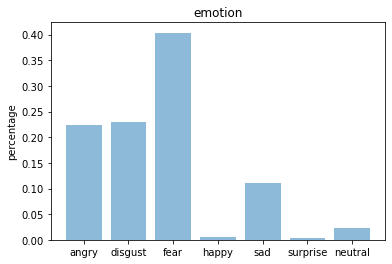

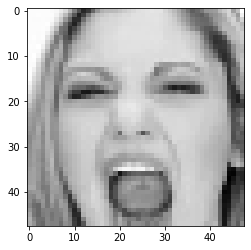

In [ ]:

#Hacer predicciones de la imagen fuera del conjunto de prueba
img = image.load_img("rostro_12.jpg", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(x)
plt.show()

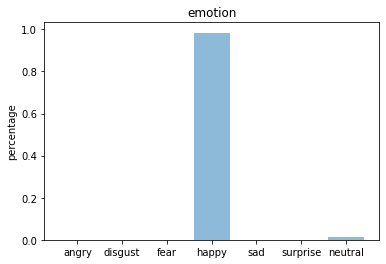

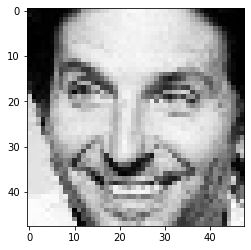

In [ ]:
img = image.load_img("rostro_28.jpg", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(x)
plt.show()

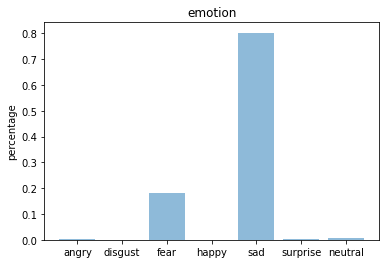

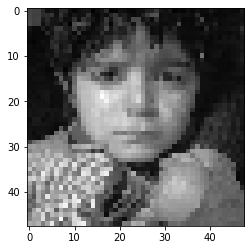

In [ ]:
img = image.load_img("tristeza.jpg", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(x)
plt.show()

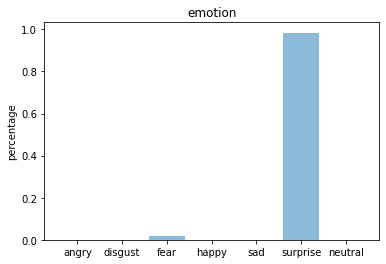

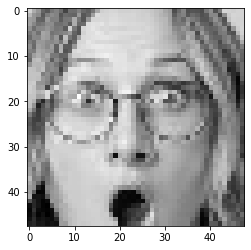

In [ ]:
img = image.load_img("rostro_119.jpg", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(x)
plt.show()

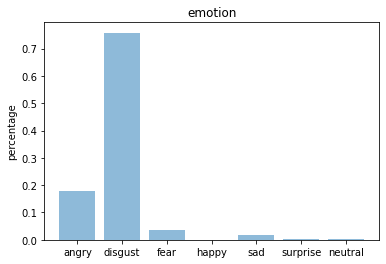

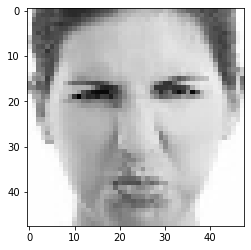

In [ ]:
img = image.load_img("rostro_84.jpg", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(x)
plt.show()

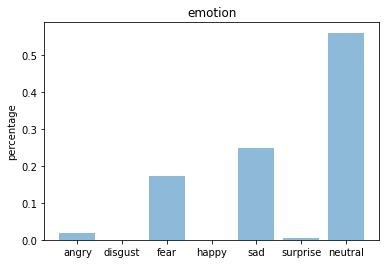

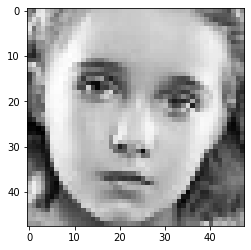

In [ ]:
img = image.load_img("rostro_107.jpg", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(x)
plt.show()

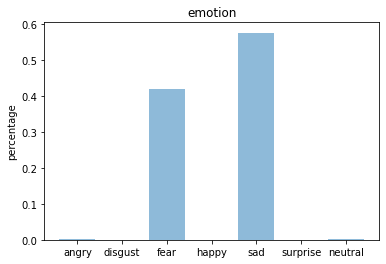

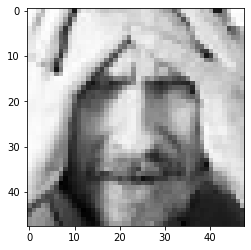

In [ ]:
img = image.load_img("rostro_10.jpg", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(x)
plt.show()

# Conclusiones
-Para poder mejorar la precisión del modelo se podrian implemetar mas imagenes al conjunto de datos, estas imagenes se puden adquirir y preprocesar en entornos no ideales, para que la red tenga mas información y pueda predecir mejor la misma.

-Las CNN son herramientas muy poderosas para la predicción de etiquetas, ya que deslimita el entorno en el cual se encuentren los datos a evaluar.

-Los modelos de CNN se pueden crear para necesidades especificas, ya que los entornos de desarrollo Keras y TensorFlow  permiten la implementación de una numerosa cantidad de metodos. 

# Referencias

- https://psicologiaymente.com/clinica/tipos-de-agnosia-visual
- https://neurorhb.com/blog-dano-cerebral/prosopagnosia-quien-es-quien/
- https://blog.neuronup.com/fichas-estimulacion-cognitiva-trabajar-gnosias/
- https://www.kaggle.com/gauravsharma99/facial-emotion-recognition
- https://www.kaggle.com/shawon10/facial-expression-detection-cnn
- https://sefiks.com/2018/01/01/facial-expression-recognition-with-keras/
- https://www.milenio.com/espectaculos/famosos/brad-pitt-padece-prosopagnosia-que-es
- GABRIELA SOLANO [OMES]. (2020). Reconocimiento Facial | Python - OpenCV [Archivo de video]. Recuperado de: https://www.youtube.com/watch?v=cZkpaL36fW4
- GABRIELA SOLANO [OMES]. (2020). ALMACENANDO ROSTROS usando imágenes y video | Python - OpenCV [Archivo de video]. Recuperado de: https://www.youtube.com/watch?v=ZYPyM4JUU7w
- https://developers.google.com/machine-learning/crash-course/ml-intro
- https://medium.com/metadatos/gu%C3%ADa-r%C3%A1pida-sobre-preprocesamiento-de-im%C3%A1genes-faciales-para-redes-neuronales-usando-opencv-en-c68599ca08dd
- https://es.wikipedia.org/wiki/Sistema_de_reconocimiento_facial
- https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/blocks/dropout
- https://keras.io/api/layers/activations/
- Eigenfaces for recognicion